## Mnist version 2: using usual keras "add" to build nn

### Import Libraries

In [7]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [20]:
import numpy as np
import matplotlib.pyplot as plt

### Defining batch size, classes and epochs

In [8]:
batch_size = 128
num_classes = 10
epochs = 20

### The data, split between train and test sets

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Print the shape of the data

In [10]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### Convert class vectors to binary class matrices

In [11]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Build the model

In [12]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-01-14 09:14:46.047241: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-14 09:14:46.047674: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [14]:
model.layers

In [15]:
model.layers[0].get_config()

{'name': 'dense',
 'trainable': True,
 'dtype': 'float32',
 'batch_input_shape': (None, 784),
 'units': 512,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

### Fit the model

In [16]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/20


2023-01-14 09:14:46.578045: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-14 09:14:46.947590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.2416 - accuracy: 0.9262

2023-01-14 09:14:54.775255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 9s 13ms/step - loss: 0.2416 - accuracy: 0.9262 - val_loss: 0.0943 - val_accuracy: 0.9698
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0987 - accuracy: 0.9699 - val_loss: 0.0804 - val_accuracy: 0.9755
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0740 - accuracy: 0.9778 - val_loss: 0.0831 - val_accuracy: 0.9768
Epoch 4/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0585 - accuracy: 0.9823 - val_loss: 0.0791 - val_accuracy: 0.9774
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0479 - accuracy: 0.9859 - val_loss: 0.0781 - val_accuracy: 0.9797
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0414 - accuracy: 0.9873 - val_loss: 0.0757 - val_accuracy: 0.9820
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.0785 - val_accuracy: 0.9820
Epoch 8/20

In [17]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.03268204, -0.04718146, -0.0353151 , ...,  0.06793372,
         -0.02742421,  0.01231943],
        [ 0.01651284,  0.02669697,  0.00234345, ..., -0.01581071,
          0.05618615, -0.05851312],
        [ 0.06441845, -0.02885208, -0.01582188, ..., -0.02571022,
         -0.02989827,  0.00072873],
        ...,
        [ 0.00133935, -0.06652056, -0.03448009, ..., -0.04591044,
         -0.05209217, -0.06269248],
        [ 0.01379618,  0.00919736, -0.04218354, ..., -0.06632756,
         -0.05803122,  0.04441919],
        [-0.02435067,  0.05823933, -0.01036446, ...,  0.00463118,
          0.0141315 , -0.01768737]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.18638927, -0.06551787, -0.00155285, -0.10204244, -0.05675367,
        -0.01390785, -0.09750003, -0.10470088, -0.08887363, -0.07631937,
        -0.11662559, -0.05498279,  0.01002481, -0.0676147 , -0.05951777,
    

In [18]:
score = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 2s 8ms/step - loss: 0.1439 - accuracy: 0.9844


In [19]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14391301572322845
Test accuracy: 0.9844000339508057


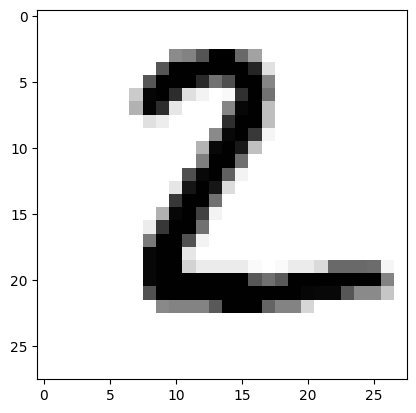

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
plt.imshow(x_test[1].reshape(28,28),cmap=plt.cm.binary)
plt.show()

y_test[1]